In [13]:
#Science Extention 2021 notebook By James Bian. All rights reserved. Reuse is allowed with credit to the origional <3.

In [14]:
# IMPORTING ALL NECESSARY TOOLS
# Include any other imports you want in this cell.

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.quantum_info import state_fidelity, process_fidelity
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.ibmq import least_busy
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

# Importing other useful Python tools
%matplotlib inline
import matplotlib.pylab as plt
from math import pi, sqrt
import numpy as np
import pandas as pd
import csv
from IPython.display import FileLink
import time

from qiskit import *
from numpy import *

from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

In [ ]:


controls = QuantumRegister(3, "c_qb")
target = QuantumRegister(1, "t_qb")
c_reg = ClassicalRegister(5, "c_bit")
circuit = QuantumCircuit(controls, target, c_reg)
circuit.h(controls[0])
circuit.h(controls[1])
circuit.h(controls[2])
circuit.h(target[0])

for n in range(3):
    circuit.x(controls[n])
    
circuit.h(target[0])
circuit.mct(controls, target[0], None, mode='advanced')

for n in range(3):
    circuit.x(controls[n])
    circuit.h(controls[n])
    circuit.x(controls[n])

circuit.cz(controls[0], controls[2])
for n in range(3):
    circuit.x(controls[n])
    
circuit.h(target[0])
for n in range(3):
    circuit.h(controls[n])
    circuit.measure(controls[n], c_reg[n])
circuit.measure(target[0], c_reg[3])

circuit.draw()

from qiskit.quantum_info import Statevector

backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots = 1000)
plot_histogram(job.result().get_counts(), color='black', title="Result")


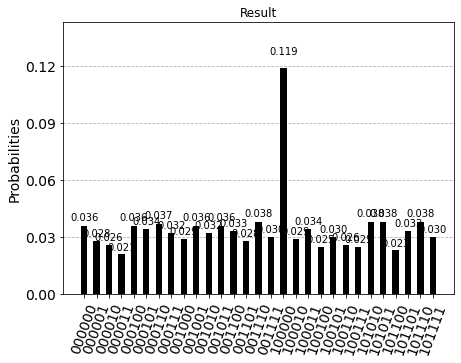

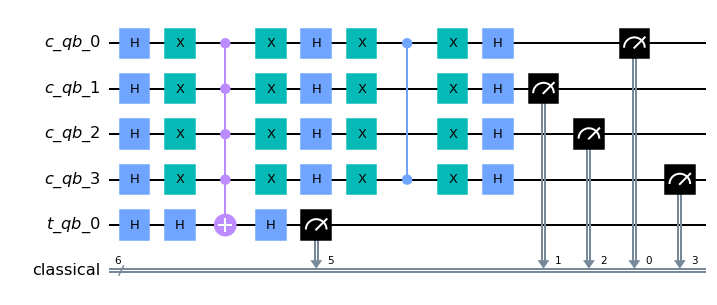

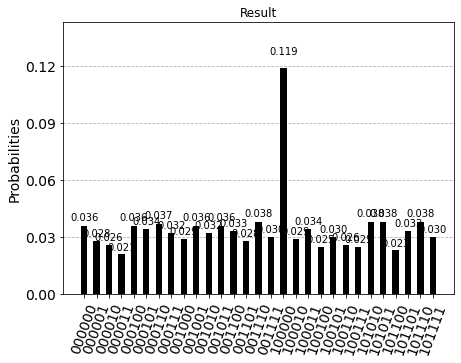

In [ ]:
controls = QuantumRegister(4, "c_qb")
target = QuantumRegister(1, "t_qb")
c_reg = ClassicalRegister(6, "classical")
grov4 = QuantumCircuit(controls, target, c_reg)
grov4.h(target[0])

for n in range(4):
    grov4.h(controls[n])
    grov4.x(controls[n])
grov4.h(target[0])
grov4.mct(controls, target[0], None, mode='advanced')
grov4.h(target[0])

for n in range(4):
    grov4.x(controls[n])
    grov4.h(controls[n])
    grov4.x(controls[n])

grov4.cz(controls[0],controls[3])
for n in range(4):
    grov4.x(controls[n])
    grov4.h(controls[n])
    grov4.measure(controls[n], c_reg[n])
grov4.measure(target[0], c_reg[5])

grov4.draw()

backend = BasicAer.get_backend('qasm_simulator')
job = execute(grov4, backend, shots = 1000)
plot_histogram(job.result().get_counts(), color='black', title="Result")


ibmqfactory.load_account:WARNING:2021-06-24 14:38:44,420: Credentials are already in use. The existing account in the session will be replaced.


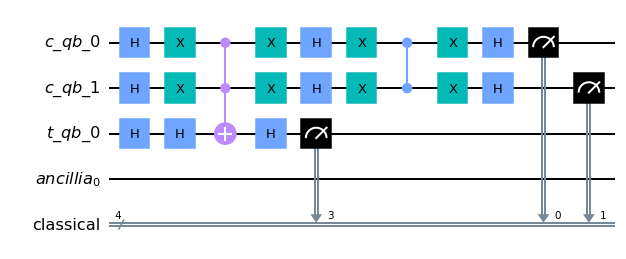

In [17]:
#Cq = number of control qubits
#Reminder: total qubits is control qubits + 1 target qubit and 1 ancilla bit
cq = 2
#number of diffusers. Optimal number is sqrt(N) Theoretically
di = 0
#Setting up the circuit
controls = QuantumRegister(cq, "c_qb")
target = QuantumRegister(1, "t_qb")
anc = QuantumRegister(1, "ancillia")
c_reg = ClassicalRegister( cq + 2 , "classical")
grov4 = QuantumCircuit(controls, target, c_reg, anc)
grov4.h(target[0])
#Initial super position
for n in range(cq):
    grov4.h(controls[n])
    #Diffuser Father
#oracle
for n in range(cq):
    grov4.x(controls[n])
grov4.h(target[0])
grov4.mct(controls, target[0], anc, mode='advanced')
grov4.h(target[0])
#amplification
for n in range(cq):
    grov4.x(controls[n])
    grov4.h(controls[n])
    grov4.x(controls[n])
grov4.cz(controls[0],controls[cq-1])
for n in range(cq):
    grov4.x(controls[n])
    grov4.h(controls[n])
    #Diffuser Child
#oracle
for n in range(di):
    for n in range(cq):
        grov4.x(controls[n])
    #grov4.h(target[0])
    grov4.mct(controls, target[0], anc, mode='advanced')
    #grov4.h(target[0])
#amplification
    for n in range(cq):
        grov4.x(controls[n])
        grov4.h(controls[n])
        grov4.x(controls[n])
    grov4.cz(controls[0],controls[cq-1])
    for n in range(cq):
        grov4.x(controls[n])
        grov4.h(controls[n])
#Measurement
for n in range(cq):
    grov4.measure(controls[n], c_reg[n])
grov4.measure(target[0], c_reg[cq+1])

grov4.draw()
provider = IBMQ.load_account()
backend2 = provider.get_backend('ibmq_qasm_simulator')
job = execute(grov4, backend2, shots = 1000)
#plot_histogram(job.result().get_counts(), color='black', title="Result")

## 

ibmqfactory.load_account:WARNING:2021-06-24 14:38:48,020: Credentials are already in use. The existing account in the session will be replaced.


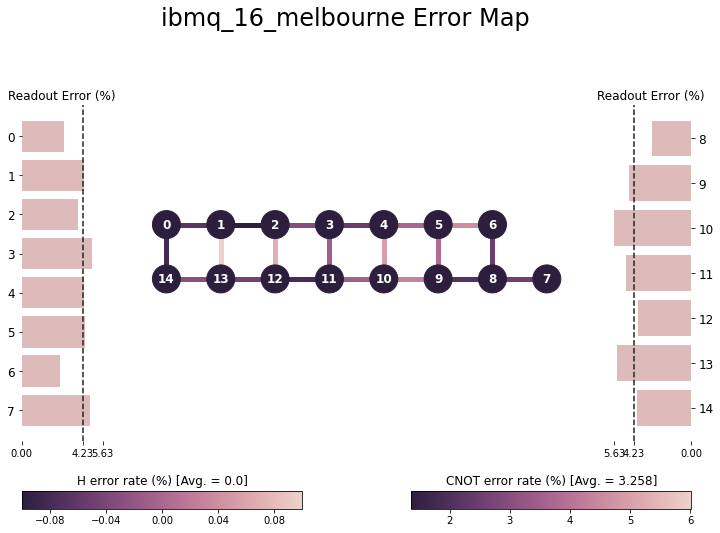

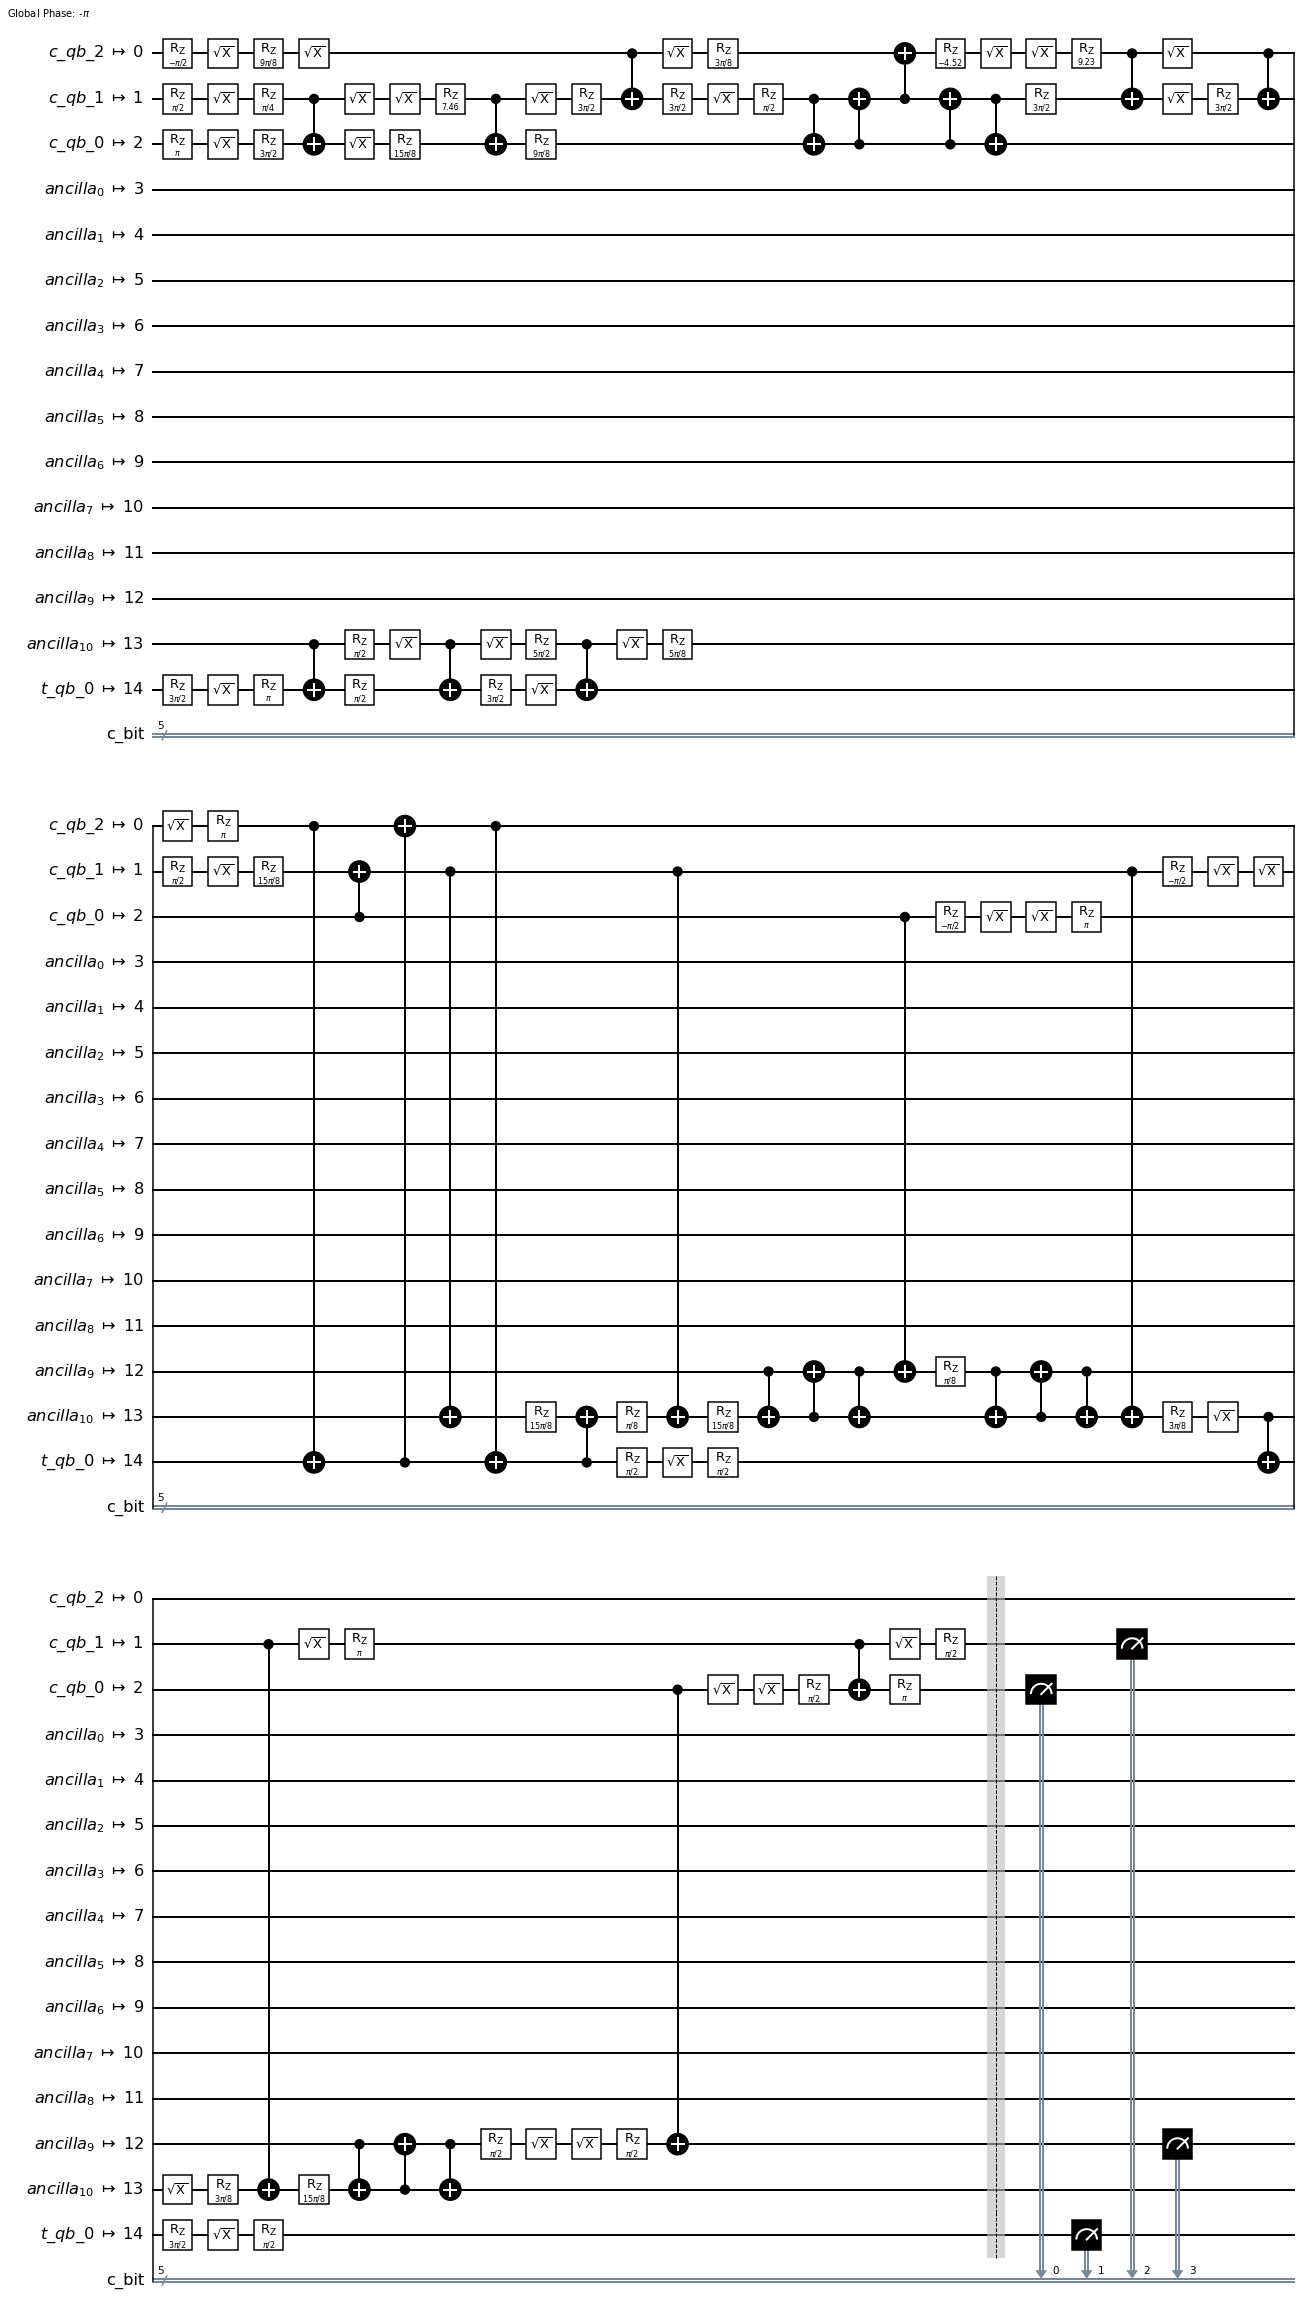

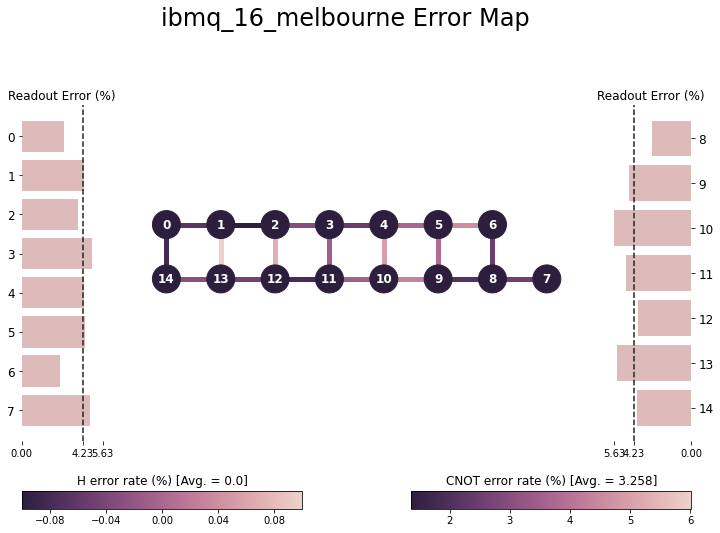

In [18]:
from qiskit.compiler import transpile
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_16_melbourne')
Circuit_Transpile = transpile(circuit, backend , initial_layout =None, optimization_level=3)
Circuit_Transpile.draw( 'mpl',style={'name': 'bw'}, scale = 1)

from qiskit.visualization import plot_error_map
plot_error_map(backend)


In [19]:
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

# Build noise model from backend properties
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_16_melbourne')
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Make a circuit

# Perform a noise simulation
result = execute(grov4, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 seed = 6969,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
#plot_histogram(counts)

ibmqfactory.load_account:WARNING:2021-06-24 14:38:53,869: Credentials are already in use. The existing account in the session will be replaced.


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


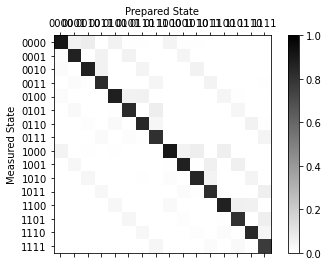

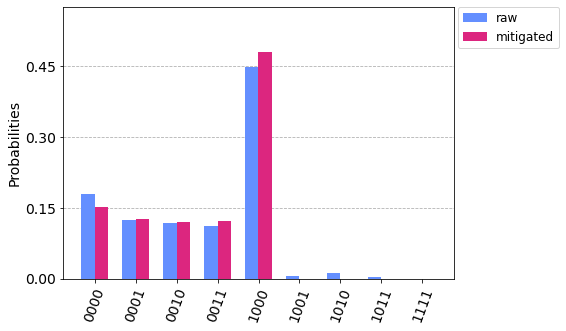

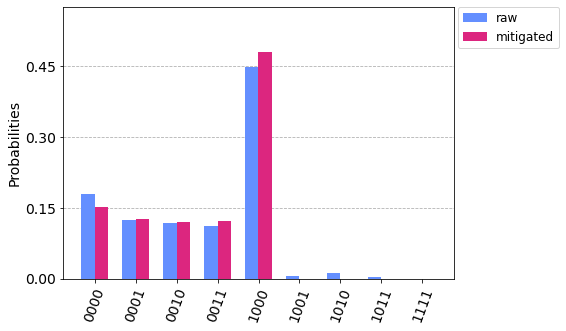

In [20]:
#measurement Error mitigation
qr = qiskit.QuantumRegister(cq+2)
qubit_list = range(cq+2)
meas_calibs, state_labels = complete_meas_cal(qubit_list=qubit_list, qr=qr, circlabel='mcal')
# Execute the calibration circuits without noise
backend = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(meas_calibs, backend=backend, shots=1000)
cal_results = job.result()

# The calibration matrix without noise is the identity matrix
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
print(meas_fitter.cal_matrix)

# Generate a noise model for the 16 qubits
noise = provider.get_backend('ibmq_16_melbourne')
noise_model = NoiseModel.from_backend(noise)
# Execute the calibration circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(meas_calibs, backend=backend, shots=1000, noise_model=noise_model)
cal_results = job.result()

# Calculate the calibration matrix with the noise model
meas_fitter = CompleteMeasFitter(cal_results, state_labels, qubit_list=qubit_list, circlabel='mcal')
#print(meas_fitter.cal_matrix)

meas_fitter.plot_calibration()


job = qiskit.execute([grov4], backend=backend, shots=5000, noise_model=noise_model)
results = job.result()

# Results without mitigation
raw_counts = results.get_counts()

# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(results)
mitigated_counts = mitigated_results.get_counts(0)

from qiskit.tools.visualization import *
plot_histogram([raw_counts, mitigated_counts],bar_labels=False, legend=['raw', 'mitigated'])

In [21]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-06-24 14:39:01,833: Credentials are already in use. The existing account in the session will be replaced.


In [22]:
def all_probs(counts):
    probs = np.array([])
    for s in possible_states(len(list(counts)[0])):
        if(s in counts.keys()):
            probs=np.append(probs,counts[s])
        else:
            probs=np.append(probs,0)
    probs = probs/sum(probs)
    return(probs)

def possible_states(n):
    states = list()
    for i in range(2**n):
        states.append( format(i, '0'+str(n)+'b') )
    return states

backend = qiskit.Aer.get_backend('qasm_simulator')
job = execute(grov4, backend, shots=1000)
result_sim = job.result()
counts_sim = result_sim.get_counts(grov4)
# Calculate probabilities from counts
prob_sim = all_probs(counts_sim)
prob_raw = all_probs(raw_counts)


# Dot product of square root of probabilities, all squared = fidelity
fid_raw = np.dot(np.sqrt(prob_sim),np.sqrt(prob_raw))**2



prob_mit = all_probs(mitigated_counts)
fid_mit = np.dot(np.sqrt(prob_sim),np.sqrt(prob_mit))**2

#plot_histogram([mitigated_counts],bar_labels=True, legend=['mitr'])
#plot_histogram([raw_counts], legend=['raw'])
display(fid_raw)
display(fid_mit)

def export_dict(filename,dict):
    with open(filename, 'w') as f:
        w = csv.DictWriter(f, dict.keys())
        w.writeheader()
        w.writerow(dict)
    local_file = FileLink(filename, result_html_prefix="Click here to download: ")
    display(local_file)

filename = 'raw results'
export_dict(filename,raw_counts)

filename = 'mit results'
export_dict(filename,mitigated_counts)


0.9677318939142748

0.9950326451583369

/home/jovyan/raw results

/home/jovyan/mit results

In [23]:
display(fid_raw)

0.9677318939142748

In [24]:
display(fid_mit)

0.9950326451583369